<a href="https://colab.research.google.com/github/NgoMinhQuang/project_cuoi_ki_AI/blob/main/Age%26Gender(realtime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tư tưởng bài toán**
Với đề tài "Dự đoán tuổi, hình dạng khuôn mặt, giới tính" nên chương trình có 3 nhiệm vụ là dự đoán tuổi, hình dạng khuôn mặt, giới tính. Vì thế ta cần tạo 3 mô hình CNN để training từng nhiệm vụ. Kết quả ta thu được 3 model training về tuổi, hình dạng khuôn mặt, giới tính. Cuối cùng load 3 model này vào và tiến hành bật webcam để thực hiện chương trình.
Với nhiệm vụ dự đoán tuổi, ta chia làm 7 nhóm tuổi: 0-7, 8-15, 16-23, 24-32, 33-50, 51-65, 66-100. Với nhiệm vụ phát hiện ra hình dạng khuôn mặt chia làm 5 loại: heart – mặt trái tim, oblong – mặt thuôn dài, oval – mặt trái xoan, round – mặt tròn, square – mặt vuông. Cuối cùng với vấn đề dự đoán giới tính chia thành: male – nam và female – nữ thông qua khuôn mặt của một người.
Tiếp theo, ta sẽ đi thực hiện từng nhiệm vụ riêng biệt.

# **I. Dự đoán tuổi**


Sau khi up các tập dữ liệu về độ tuổi, giới tính, hình dạng khuôn mặt lên Google Drive thì việc đầu tiên cần làm là cho phép Google Colab truy cập vào Drive.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tiếp theo, ta sẽ import các thư viện cần thiết cho chương trình.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import cv2
import os
from os import listdir
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Tạo tên class tương ứng với dữ liệu đầu vào (ở đây ta thực hiện cho bài toán nhận dạng tuổi nên chia thành 7 class tương ứng là: Age: 0-7, Age: 8-15, Age: 16-23, Age: 24-32, Age: 33-50, Age: 51-65, Age: 66-100).

In [ ]:
folder1 = '/content/drive/MyDrive/Colab Notebooks/data/Age/0-7'
folder2 = '/content/drive/MyDrive/Colab Notebooks/data/Age/8-15'
folder3 = '/content/drive/MyDrive/Colab Notebooks/data/Age/16-23'
folder4 = '/content/drive/MyDrive/Colab Notebooks/data/Age/24-32'
folder5 = '/content/drive/MyDrive/Colab Notebooks/data/Age/33-50'
folder6 = '/content/drive/MyDrive/Colab Notebooks/data/Age/51-65'
folder7 = '/content/drive/MyDrive/Colab Notebooks/data/Age/66-100'
photos, labels = list(), list()
for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0) 
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(1) 
for file in listdir(folder3):
  photo = load_img(folder3+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(2) 
for file in listdir(folder4):
  photo = load_img(folder4+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(3) 
for file in listdir(folder5):
  photo = load_img(folder5+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(4) 
for file in listdir(folder6):
  photo = load_img(folder6+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(5) 
for file in listdir(folder7):
  photo = load_img(folder7+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(6) 
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dạng mảng
class_name =  ['Age: 0-7','Age: 8-15','Age: 16-23','Age: 24-32','Age: 33-50','Age: 51-65','Age: 66-100']   #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)

(5280, 150, 150, 3) (5280,) ['Age: 0-7', 'Age: 8-15', 'Age: 16-23', 'Age: 24-32', 'Age: 33-50', 'Age: 51-65', 'Age: 66-100']


Tạo dữ liệu với 75% dành cho việc training và 25% dành cho việc test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(3960, 150, 150, 3) (1320, 150, 150, 3)
(3960,) (1320,)


Show 9 ảnh ngẫu nhiên dưới dạng ma trận 3x3.

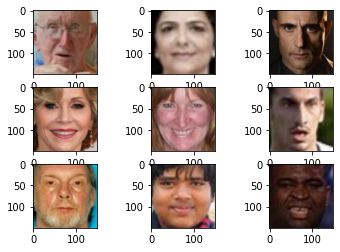

In [ ]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

Thực hiện quá trình chuẩn hóa dữ liệu.

In [ ]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

Tạo mô hình mạng CNN với 3 lớp (Convolution, ReLU, Max Pooling). Sau đó ta tiến hành training dữ liệu để máy tính học 200 lần với batch_size =64 (batch_size là số lượng mẫu trong 1 lần huấn luyện, batch_size =64 nghĩa là 1 lần lặp ta sẽ cho ngẫu nhiên 64 bức hình chạy lan truyền tiến trong mạng CNN). Sau khi training xong ta sẽ thu được một file model.

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(7, activation='Softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=200,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/age.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
62/62 [==============================] - 17s 82ms/step - loss: 1.8922 - accuracy: 0.2722 - val_loss: 1.7591 - val_accuracy: 0.3182
Epoch 2/200
62/62 [==============================] - 4s 59ms/step - loss: 1.6216 - accuracy: 0.3611 - val_loss: 1.4463 - val_accuracy: 0.4758
Epoch 3/200
62/62 [==============================] - 4s 59ms/step - loss: 1.2528 - accuracy: 0.4949 - val_loss: 1.3154 - val_accuracy: 0.4659
Epoch 4/200
62/62 [==============================] - 4s 62ms/step - loss: 1.1442 - accuracy: 0.5396 - val_loss: 1.2618 - val_accuracy: 0.4826
Epoch 5/200
62/62 [==============================] - 4s 62ms/step - loss: 1.0191 - accuracy: 0.5947 - val_loss: 1.1487 - val_accuracy: 0.5341
Epoch 6/200
62/62 [==============================] - 4s 61ms/step - loss: 0.9133 - accuracy: 0.6316 - val_loss: 1.1356 - val_accuracy: 0.5492
Epoch 7/200
62/62 [==============================] - 4s 60ms/step - loss: 0.8103 - accuracy: 0.6783 - val_loss: 1.1205 - val_accuracy: 0.5462
Epoch

Tiếp theo ta sẽ đi vẽ đồ thị về sai số kiểm tra và độ chính xác kiểm tra.

Sai số kiểm tra là:  3.495633125305176
Độ chính xác kiểm tra là:  0.5515151619911194


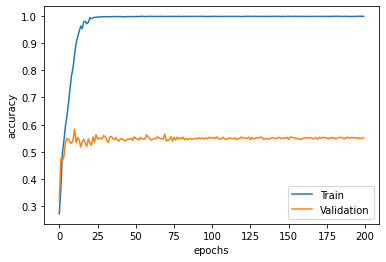

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.show()

# **II. Dự đoán giới tính**

Tạo tên class tương ứng với dữ liệu đầu vào (ở đây ta thực hiện cho bài toán nhận dạng giới tính nên chia thành 2 class tương ứng là: male-nam và female-nữ).

In [ ]:
folder1 = '/content/drive/MyDrive/Colab Notebooks/data/Gender/Female'
folder2 = '/content/drive/MyDrive/Colab Notebooks/data/Gender/Male'
photos, labels = list(), list()
for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0) 
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(1) 

photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dạng mảng
class_name =  ['Gender: Female','Gender: Male']   #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)

(5646, 150, 150, 3) (5646,) ['Gender: Female', 'Gender: Male']


Tạo dữ liệu với 75% dành cho việc training và 25% dành cho việc test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4234, 150, 150, 3) (1412, 150, 150, 3)
(4234,) (1412,)


Show 9 ảnh ngẫu nhiên dưới dạng ma trận 3x3.

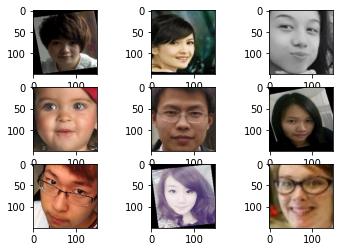

In [ ]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

Thực hiện quá trình chuẩn hóa dữ liệu.

In [ ]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

Tạo mô hình mạng CNN với 3 lớp (Convolution, ReLU, Max Pooling).

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

Ta tiến hành training dữ liệu để máy tính học 200 lần với batch_size =64 (batch_size là số lượng mẫu trong 1 lần huấn luyện, batch_size =64 nghĩa là 1 lần lặp ta sẽ cho ngẫu nhiên 64 bức hình chạy lan truyền tiến trong mạng CNN). Sau khi training xong ta sẽ thu được một file model.

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(2, activation='Softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=200,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/gender.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
67/67 [==============================] - 6s 75ms/step - loss: 0.6099 - accuracy: 0.7556 - val_loss: 0.3178 - val_accuracy: 0.8647
Epoch 2/200
67/67 [==============================] - 4s 59ms/step - loss: 0.2751 - accuracy: 0.8843 - val_loss: 0.3855 - val_accuracy: 0.8329
Epoch 3/200
67/67 [==============================] - 4s 66ms/step - loss: 0.2358 - accuracy: 0.9074 - val_loss: 0.2742 - val_accuracy: 0.8803
Epoch 4/200
67/67 [==============================] - 5s 72ms/step - loss: 0.1742 - accuracy: 0.9291 - val_loss: 0.1653 - val_accuracy: 0.9384
Epoch 5/200
67/67 [==============================] - 4s 62ms/step - loss: 0.1355 - accuracy: 0.9464 - val_loss: 0.1422 - val_accuracy: 0.9476
Epoch 6/200
67/67 [==============================] - 5s 68ms/step - loss: 0.1094 - accuracy: 0.9589 - val_loss: 0.1426 - val_accuracy: 0.9441
Epoch 7/200
67/67 [==============================] - 4s 62ms/step - loss: 0.1103 - accuracy: 0.9577 - val_loss: 0.2605 - val_accuracy: 0.9051
Epoch 

Tiếp theo ta sẽ đi vẽ đồ thị về sai số kiểm tra và độ chính xác kiểm tra.

Sai số kiểm tra là:  0.3883247375488281
Độ chính xác kiểm tra là:  0.9490085244178772


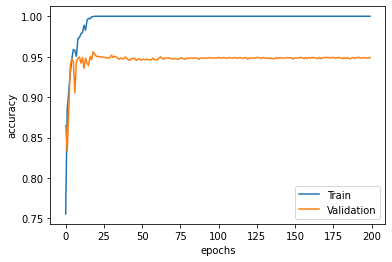

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.show()

Đến đây là đã xong quá trình training cho 2 nhiệm vụ dự đoán tuổi và giới tính. Nhiệm vụ dự đoán hình dạng khuôn mặt sẽ được thực hiện trong cửa sổ mới.

# **III. Nhận dạng real time**

Ta sẽ sử dụng một thuật toán phát hiện đối tượng đơn giản có tên là Haar Cascade. Mô hình này là mô hình đã được đào tạo trước bởi OpenCV.

In [10]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Quá trình training dữ liệu đã xong. Việc cần làm bây giờ là bật webcam để cho máy tính nhận diện. Ta sử dụng JavaScript để yêu cầu quyền truy cập vào webcam của máy tính và show lên trình duyệt.

In [15]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

Ta sẽ viết 2 chương trình con là js_to_image để chuyển đổi ảnh trả về từ JavaScript và chuyển đổi ảnh này sang OpenCV để nhận dạng. Chương trình con thứ hai là bbox_to_bytes để chuyển đổi bbox thành image đè lên trên video.

In [12]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Tiếp theo tiến hành đọc dữ liệu từ webcam người dùng và trả về cho Python nhận dạng.

In [17]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model 
model_file_path1 = "/content/drive/MyDrive/age.h5"
model_file_path2= "/content/drive/MyDrive/gender.h5"
model_file_path3 = "/content/drive/MyDrive/faceshape_1.h5"


vggmodel1 = load_model(model_file_path1)
vggmodel2 = load_model(model_file_path2)
vggmodel3 = load_model(model_file_path3)
classes1 = ['Age: 0-7','Age: 8-15','Age: 16-23','Age: 24-32','Age: 33-50','Age: 51-65','Age: 66-100']
classes2 = ['Genger: Female','Gender: Male']
classes3 = ['Faceshape: Heart','Faceshape: Oblong','Faceshape: Oval','Faceshape: Round','Faceshape: Square']
while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(150,150))
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred1 = vggmodel1.predict(tensor)
    pred2 = vggmodel2.predict(tensor)
    pred3 = vggmodel3.predict(tensor)
    class_id1 = np.argmax(pred1)
    class_id2 = np.argmax(pred2)
    class_id3 = np.argmax(pred3)
    class_name1 = classes1[class_id1]
    class_name2 = classes2[class_id2]
    class_name3 = classes3[class_id3]

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name1),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (255, 0,0), 2)
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name2),
                        (200, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name3),
                        (400, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0,0, 255), 2)
    # grayscale image for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


/content


<IPython.core.display.Javascript object>